In [1]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
from pandas import plotting
import numpy as np


pandas.set_option('display.max_columns', None)  
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', -1)
pandas.set_option('display.precision', 3)

C:\Users\Inanna\Anaconda2\envs\tensorflow\lib\site-packages\matplotlib\__init__.py:907: MatplotlibDeprecationWarning: The backend.qt4 rcParam was deprecated in version 2.2.  In order to force the use of a specific Qt binding, either import that binding first, or set the QT_API environment variable.
  mplDeprecation)
C:\Users\Inanna\Anaconda2\envs\tensorflow\lib\site-packages\matplotlib\__init__.py:907: MatplotlibDeprecationWarning: The backend.qt4 rcParam was deprecated in version 2.2.  In order to force the use of a specific Qt binding, either import that binding first, or set the QT_API environment variable.
  mplDeprecation)


# Read the data

In [2]:
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")
data=data.drop(labels='Index',axis=1)
print(data[0:10])

   Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0  Female  133   132  124  118.0   64.5    816932   
1  Male    140   150  124 NaN      72.5    1001121  
2  Male    139   123  150  143.0   73.3    1038437  
3  Male    133   129  128  172.0   68.8    965353   
4  Female  137   132  134  147.0   65.0    951545   
5  Female  99    90   110  146.0   69.0    928799   
6  Female  138   136  131  138.0   64.5    991305   
7  Female  92    90   98   175.0   66.0    854258   
8  Male    141   93   84   134.0   66.3    904858   
9  Male    133   114  147  172.0   68.8    955466   


# Uni-variate description of the data

In [3]:
data.describe(include='all')

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40,40.000,40.000,40.000,38.000,39.000,4.000e+01
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Male,NaN,NaN,NaN,NaN,NaN,NaN
freq,20,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,117.450,112.350,111.025,151.053,68.526,9.088e+05
std,NaN,31.137,23.616,22.471,23.479,3.995,7.228e+04
min,NaN,77.000,71.000,72.000,106.000,62.000,7.906e+05
25%,NaN,90.750,90.000,88.250,135.250,66.000,8.559e+05
50%,NaN,131.000,113.000,115.000,146.500,68.000,9.054e+05
75%,NaN,138.250,129.750,128.000,172.000,70.500,9.501e+05


## Boxplots and histograms

Boxplots


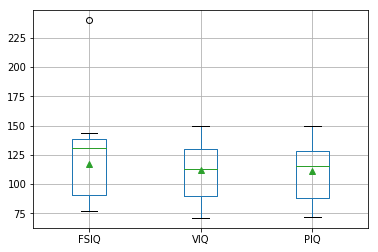

In [4]:
data.boxplot(column=['FSIQ', 'VIQ', 'PIQ'],meanline=False,showmeans=True,return_type='dict')
print("Boxplots")

Histograms


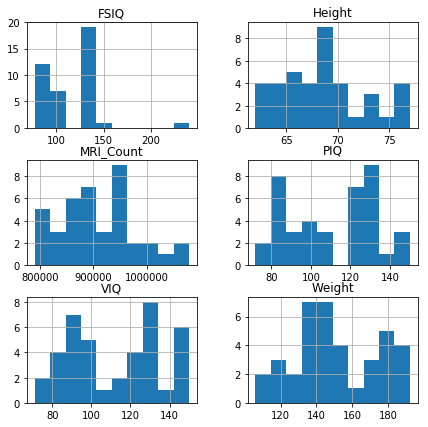

In [5]:
data.hist(column=['FSIQ', 'VIQ', 'PIQ','Weight', 'Height', 'MRI_Count'],  bins=10, figsize=[7,7])
print("Histograms")

## Identify errors or ouliers - unicariate analysis

In [6]:
data[data.FSIQ>data.FSIQ.mean()+2*data.FSIQ.std()]

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
16,Female,240,132,120,127.0,68.5,852244


### Easy solution: remove it (last resource)

In [7]:
new= data.drop(16)
new[new.FSIQ>new.FSIQ.mean()+2*new.FSIQ.std()]

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count


Boxplots


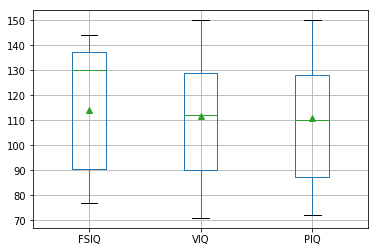

In [8]:
new.boxplot(column=['FSIQ', 'VIQ', 'PIQ'],meanline=False,showmeans=True,return_type='dict')
print("Boxplots")
data=new

### Histograms for qualitative data

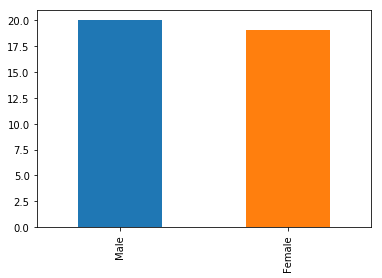

In [9]:
data.Gender.value_counts().plot(kind='bar')

### Univariate analysis depending on label

In [10]:
groupby_gender = data.groupby('Gender')
groupby_gender.describe()


FSIQ                                                    Height                                               MRI_Count                                                                              PIQ                                                     VIQ                                                    Weight                                                      
       count     mean     std   min    25%    50%    75%    max  count    mean    std   min   25%   50%    75%   max     count        mean        std       min        25%       50%       75%        max count     mean     std   min   25%    50%    75%    max count     mean     std   min    25%    50%    75%    max  count     mean     std    min     25%    50%     75%    max
Gender                                                                                                                                                                                                                                                                                                                                                                                 
Female  19.0  110.842  23.845  77.0  89.50  101.0  133.0  140.0  19.0   65.621  2.256  62.0  64.5  66.0  66.50  70.5  19.0      863202.526  57369.958  790619.0  824352.00  856472.0  886440.0  9.913e+05  19.0  109.947  22.429  72.0  92.0  110.0  129.5  147.0  19.0  108.263  21.587  71.0  90.00  112.0  129.0  136.0  19.0   137.737  17.243  106.0  124.50  139.0  146.50  175.0
Male    20.0  117.600  24.844  80.0  95.25  133.0  140.0  144.0  19.0   71.432  3.283  66.3  68.9  70.5  73.75  77.0  20.0      954855.400  55911.355  879987.0  919529.25  947241.5  973496.0  1.080e+06  20.0  111.600  23.540  74.0  86.0  117.0  128.0  150.0  20.0  115.250  25.641  77.0  95.25  110.5  145.0  150.0  18.0   166.444  20.048  132.0  148.75  172.0  180.75  192.0

Boxplots separated by Gender


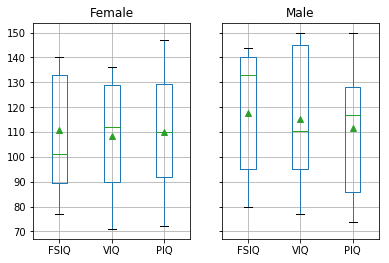

In [11]:
groupby_gender.boxplot(column=['FSIQ', 'VIQ', 'PIQ'],meanline=False,showmeans=True,return_type='dict')
print('Boxplots separated by Gender')

# Bi-variate analysis

Scatter matrixes for correlations betwen numerical variables 


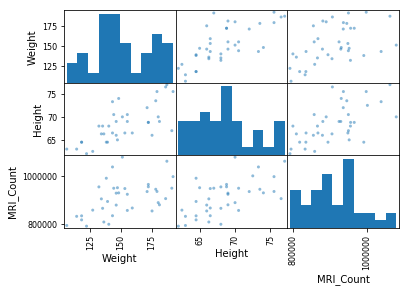

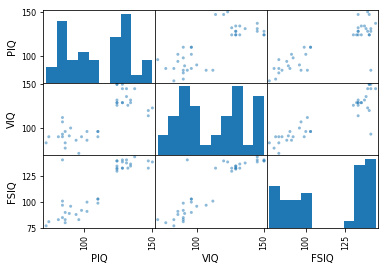

In [12]:
# Scatter matrices for different columns
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])
print('Scatter matrixes for correlations betwen numerical variables ')

In [13]:
print(data.corr(method='pearson'))

            FSIQ    VIQ    PIQ  Weight  Height  MRI_Count
FSIQ       1.000  0.898  0.866 -0.075  -0.119   0.374    
VIQ        0.898  1.000  0.778 -0.053  -0.072   0.361    
PIQ        0.866  0.778  1.000  0.014  -0.077   0.399    
Weight    -0.075 -0.053  0.014  1.000   0.711   0.503    
Height    -0.119 -0.072 -0.077  0.711   1.000   0.607    
MRI_Count  0.374  0.361  0.399  0.503   0.607   1.000    


### Finding errors (or outliers) with bi-variate analysis

In [14]:
# Let's do regression between a pari of numeric varaibales
from scipy.optimize import curve_fit
def fit_func(x, a, b):
    return a*x+b
params = curve_fit(fit_func, data.PIQ,data.FSIQ )
print('a=',params[0][0], 'b=',params[0][1])

# Find errors or outliers
error = data.FSIQ-[fit_func(x,params[0][0],params[0][1]) for x in data.PIQ]
print(np.std(error))
print(error[error>np.mean(error)+2*np.std(error)])

data[data.FSIQ-[fit_func(x,params[0][0],params[0][1]) for x in data.PIQ]==max(data.FSIQ-[fit_func(x,params[0][0],params[0][1]) for x in data.PIQ])]

a= 0.9255547826631081 b= 11.760968823408293
11.990446205250109
8    51.492
Name: FSIQ, dtype: float64


,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
8,Male,141,93,84,134.0,66.3,904858


### Solving the error susbtituting current value by predicted value with linear regression 

In [15]:
data.FSIQ.at[8]= fit_func(data['PIQ'][8],params[0][0],params[0][1])
data.head(10)

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545
5,Female,99,90,110,146.0,69.0,928799
6,Female,138,136,131,138.0,64.5,991305
7,Female,92,90,98,175.0,66.0,854258
8,Male,89,93,84,134.0,66.3,904858
9,Male,133,114,147,172.0,68.8,955466


Scatter matrixes for correlations betwen numeriacal variables 


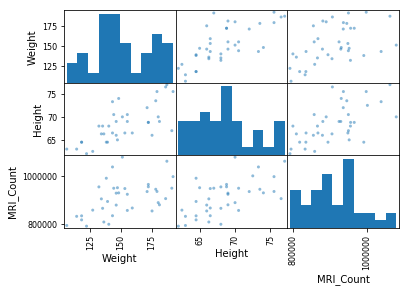

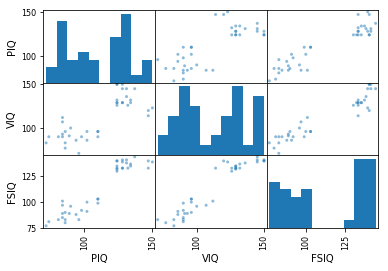

In [16]:
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])
print('Scatter matrixes for correlations betwen numeriacal variables ')

#  Missing data

In [17]:
data.isnull().any()

Gender       False
FSIQ         False
VIQ          False
PIQ          False
Weight       True 
Height       True 
MRI_Count    False
dtype: bool

In [18]:
data[data.Weight.isnull()]

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Male,140,150,124,NaN,72.5,1001121
20,Male,83,83,86,NaN,NaN,892420


In [19]:
data[data.Height.isnull()]

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
20,Male,83,83,86,NaN,NaN,892420


### Let's solve the case 1 of Weight with regression according to Height because both variables are highly correlated

In [20]:
def fit_func(x, a, b):
    return a*x+b
params = curve_fit(fit_func, data.Height,data.Weight)
print('a=',params[0][0], 'b=',params[0][1])

ValueError: array must not contain infs or NaNs

### First we have to filter the NaNs

In [21]:
df = data.dropna(axis=0)
df

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545
5,Female,99,90,110,146.0,69.0,928799
6,Female,138,136,131,138.0,64.5,991305
7,Female,92,90,98,175.0,66.0,854258
8,Male,89,93,84,134.0,66.3,904858
9,Male,133,114,147,172.0,68.8,955466
10,Female,132,129,124,118.0,64.5,833868


In [22]:
def fit_func(x, a, b):
    return a*x+b
params = curve_fit(fit_func, df.Height,df.Weight)
print('a=',params[0][0], 'b=',params[0][1])

a= 4.116208241407902 b= -129.92381529971098


In [23]:
idx = data.Weight.isnull()
#data.set_value(idx, 'Weight', fit_func(data['Height'][idx],params[0][0],params[0][1]))

#data.set_value(idx, 'Weight', fit_func(data['Height'][idx],params[0][0],params[0][1]))
print(fit_func(data['Height'][idx],params[0][0],params[0][1]))
data.Weight[idx] = fit_func(data['Height'][idx],params[0][0],params[0][1])

1     168.501
20   NaN     
Name: Height, dtype: float64


C:\Users\Inanna\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### For the remainding Nas, we will replace the value with the average of the column

In [24]:
data.fillna(data.mean())

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.000,64.500,816932
1,Male,140,150,124,168.501,72.500,1001121
2,Male,139,123,150,143.000,73.300,1038437
3,Male,133,129,128,172.000,68.800,965353
4,Female,137,132,134,147.000,65.000,951545
5,Female,99,90,110,146.000,69.000,928799
6,Female,138,136,131,138.000,64.500,991305
7,Female,92,90,98,175.000,66.000,854258
8,Male,89,93,84,134.000,66.300,904858
9,Male,133,114,147,172.000,68.800,955466
